In [1]:
import sys

import rics

# Print relevant versions
print(f"{rics.__version__=}")
print(f"{sys.version=}")
!git log --pretty=oneline --abbrev-commit -1

rics.__version__='0.1.0'
sys.version='3.8.10 (default, Nov 26 2021, 20:14:08) \n[GCC 9.3.0]'
c1eebea (HEAD -> sql-id-select, origin/sql-id-select) work workdsad


In [2]:
from rics.utility.logs import basic_config, logging

basic_config(level=logging.INFO, rics_level=logging.DEBUG)

# Title: Template
Short description of what we're testing. This is a template to copy for new stuff.

## Load data
Load some representative data we need for testing (that doesn't change between test cases or candidates).

In [3]:
import random

test_data = random.choices(
    [
        0.000000,
        0.000025,
        # 0.000050,
    ],
    k=10_000,
)

## Define the test procedure
Define the test case we want to evaluate.

## Define candidates
Define the functions or classes we're testing. Add to `candidates` list.

In [4]:
import time


def ignore_input(arg):
    return "foo"  # Ignore input


def act_on_input(arg):
    time.sleep(sum(arg))  # Process input
    return "foo"


candidates = [ignore_input, act_on_input]

## Verification
Make sure candidates are equivalent.

In [5]:
reference_output = candidates[0](test_data)
assert reference_output is not None
print("Reference output:", reference_output)

for cand in candidates[1:]:
    cand_output = cand(test_data)
    assert reference_output == cand_output, f"Bad candidate: {cand}. {cand_output=} != {reference_output=}"

Reference output: foo


## Run perfomance comparison
Run comparison, show results per candidate and test data set.

In [6]:
from rics.utility.misc import tname

2022-03-13T14:35:59.810 [rics.utility.perf:INFO] Expected total runtime: 50.00 sec.


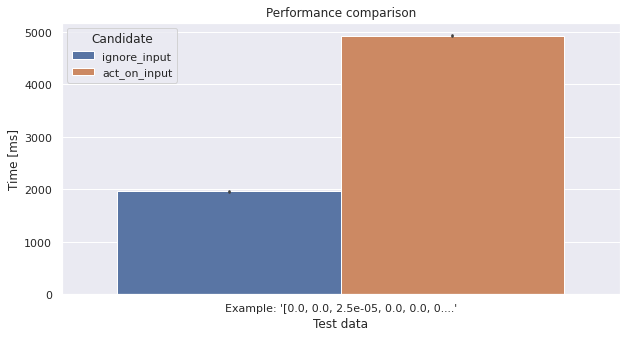

In [7]:
from rics.utility.perf import run_multivariate_test, format_perf_counter
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme("notebook")
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title("Performance comparison")

data = run_multivariate_test(candidates, test_data, ax=ax)

### Performance summary
Summarized results per candidate.

In [8]:
data.groupby("Candidate")["Time [s]"].agg(["std", "mean", "min", "max"]).applymap(lambda s: format_perf_counter(0, s))

,std,mean,min,max
Candidate,,,,
act_on_input,0.00784029 sec,4.92 sec,4.92 sec,4.94 sec
ignore_input,0.0190307 sec,1.96 sec,1.94 sec,1.99 sec


# Conclusion
Short summary. Looks like doing nothing is faster than doing something.